# NetworkX exercise 

In [1]:
%matplotlib inline
import networkx as nx
import vis_bel
import os
import pickle
import imp
import numpy as np
import itertools as itt

In [2]:
base = os.environ['BUG_FREE_EUREKA_BASE']
path_networkx_AD_pickled =os.path.join(base,'data','exercise05','networkx.graph.AD.pickled')

## Loading Alzheimer's disease network into networkX graph with pickle

In [3]:
graph_AD = pickle.load(open(path_networkx_AD_pickled,'rb'))

In [4]:
type(graph_AD)

networkx.classes.multidigraph.MultiDiGraph

Here some words about [pickle](https://docs.python.org/3/library/pickle.html)

### Explore

In [5]:
len(graph_AD),len(graph_AD.nodes()), graph_AD.number_of_nodes()  # number of nodes

(11927, 11927, 11927)

In [6]:
graph_AD.number_of_edges() # number of nodes

59408

In [7]:
graph_AD[1] # node 1 connections with edge information

{2: {0: {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'},
  1: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'}},
 1828: {0: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   '

In [8]:
graph_AD[1].keys() # nodes ids connected to node 1 

dict_keys([2, 1828])

In [9]:
graph_AD[1][2].keys()

dict_keys([0, 1])

In [10]:
graph_AD[1][2][0].get('rel')

'decreases'

In [11]:
graph_AD.nodes()[:2] # all nodes

[1, 2]

In [12]:
graph_AD.nodes(data=True)[:2]

[(1,
  {'BEL': 'a(CHEBI:"gamma-secretase inhibitor")',
   'function': 'a',
   'namespace': 'CHEBI',
   'value': 'gamma-secretase inhibitor'}),
 (2,
  {'BEL': 'complex(SCOMP:"gamma Secretase Complex")',
   'function': 'complex',
   'namespace': 'SCOMP',
   'value': '"gamma Secretase Complex"'})]

In [13]:
graph_AD.edges()[:2]

[(1, 2), (1, 2)]

In [15]:
graph_AD.edges(data=True,keys=True)[:2] #subject, object, index of edge

[(1,
  2,
  0,
  {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'}),
 (1,
  2,
  1,
  {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'})]

In [16]:
#nodes = np.random.choice(graph,size=100,replace=False)


In [17]:
nodes = set(itt.chain.from_iterable((formN,toN) for formN,toN  in graph_AD.edges()[:100]))

In [18]:
graph_100 = graph_AD.subgraph(nodes)   #smaller graph

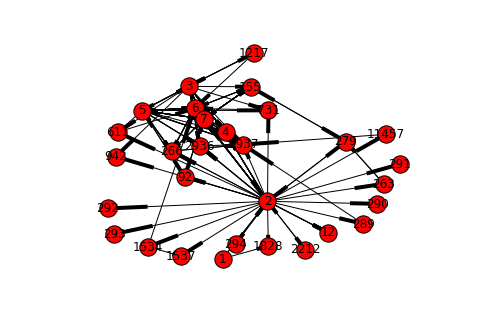

In [19]:
nx.draw_spring(graph_100, with_labels = True)

In [20]:
imp.reload(vis_bel)
vis_bel.draw(graph_100)

In [48]:
for u, v, k, a in graph_100.edges_iter(data=True,keys=True):
    print(u, v, k, a)
    break

1 2 0 {'object_activity': 'act', 'rel': 'decreases', 'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'), 'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.', 'citation': ('Other', 'Connectors', '123')}


## Tasks

0. Find the node with the highest degree in graph_100
0. get all distinct attribute keys in nodes and edges for graph_100
0. Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional
0. Find shortest paths between all nodes link to the edges found in the previsious task and create a new graph, display it 

In [49]:
#node with highest degree:
degree_list = list(graph_100.degree(graph_100.nodes()).values())
node_list = list(graph_100.nodes())

node_index = degree_list.index(max(degree_list))

node_list[node_index]


6

In [ ]:
#get all keys for all nodes and edges
attributedict={}
for u, v, k, a in graph_100.edges_iter(data=True,keys=True):
    #there is a lot of k
    attributedict[(u,v)]

**hint** : Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional

In [ ]:
def find_edge_by_attrib_key_value(graph,attribKey,attribValue=None):
    return edge_list
find_edge_by_attrib_key_value(graph_100,'MeshDisease', 'Alzheimer')